In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set



/usr/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


<Figure size 640x480 with 1 Axes>

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


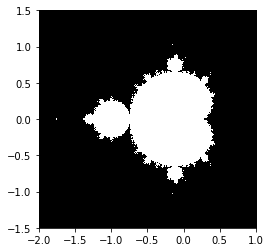

In [2]:
mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

In [3]:
def mandelbrot_numpy(c, maxiter):
    output = np.zeros(c.shape)
    z = np.zeros(c.shape, np.complex64)
    for it in range(maxiter):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        output[notdone] = it
        z[notdone] = z[notdone]**2 + c[notdone]
    output[output == maxiter-1] = 0
    return output

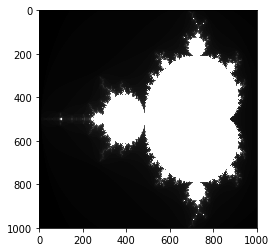

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c

        if abs(z) > 2:
            break
            pass
        pass
    return iteration

# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas
# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density):
    # location and size of the atlas rectangle

    realAxis = np.linspace(-2.025, 0.6, 1000)
    imaginaryAxis = np.linspace(-1.125, 1.125, 1000)


    # 2-D array to represent mandelbrot atlas
    atlas = np.empty((len(realAxis), len(imaginaryAxis)))

    # color each point in the atlas depending on the iteration count
    for ix in range(0,len(realAxis)):
        for iy in range(0,len(imaginaryAxis)):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)

            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass

    # plot and display mandelbrot set
    plt.imshow(atlas.T, interpolation="nearest")
    plt.show()

# time to party!!
mandelbrot(120, 1000)

In [27]:
import numpy as np



def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)



In [28]:
mandelbrot_set(-2.025, 0.6, -1.125, 1.125, 1000, 1000, 255)

(array([-2.02500000e+00, -2.02237237e+00, -2.01974474e+00, -2.01711712e+00,
        -2.01448949e+00, -2.01186186e+00, -2.00923423e+00, -2.00660661e+00,
        -2.00397898e+00, -2.00135135e+00, -1.99872372e+00, -1.99609610e+00,
        -1.99346847e+00, -1.99084084e+00, -1.98821321e+00, -1.98558559e+00,
        -1.98295796e+00, -1.98033033e+00, -1.97770270e+00, -1.97507508e+00,
        -1.97244745e+00, -1.96981982e+00, -1.96719219e+00, -1.96456456e+00,
        -1.96193694e+00, -1.95930931e+00, -1.95668168e+00, -1.95405405e+00,
        -1.95142643e+00, -1.94879880e+00, -1.94617117e+00, -1.94354354e+00,
        -1.94091592e+00, -1.93828829e+00, -1.93566066e+00, -1.93303303e+00,
        -1.93040541e+00, -1.92777778e+00, -1.92515015e+00, -1.92252252e+00,
        -1.91989489e+00, -1.91726727e+00, -1.91463964e+00, -1.91201201e+00,
        -1.90938438e+00, -1.90675676e+00, -1.90412913e+00, -1.90150150e+00,
        -1.89887387e+00, -1.89624625e+00, -1.89361862e+00, -1.89099099e+00,
        -1.8

In [29]:
# Import necessary libraries 
from PIL import Image 
from numpy import complex, array 
import colorsys 
  
# setting the width of the output image as 1024 
WIDTH = 1024
  
# a function to return a tuple of colors 
# as integer value of rgb 
def rgb_conv(i): 
    color = 255 * array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5)) 
    return tuple(color.astype(int)) 
  
# function defining a mandelbrot 
def mandelbrot(x, y): 
    c0 = complex(x, y) 
    c = 0
    for i in range(1, 1000): 
        if abs(c) > 2: 
            return rgb_conv(i) 
        c = c * c + c0 
    return (0, 0, 0) 
  
# creating the new image in RGB mode 
img = Image.new('RGB', (WIDTH, int(WIDTH / 2))) 
pixels = img.load() 
  
for x in range(img.size[0]): 
  
    # displaying the progress as percentage 
    print("%.2f %%" % (x / WIDTH * 100.0))  
    for y in range(img.size[1]): 
        pixels[x, y] = mandelbrot((x - (0.75 * WIDTH)) / (WIDTH / 4), 
                                      (y - (WIDTH / 4)) / (WIDTH / 4)) 
  
# to display the created fractal after  
# completing the given number of iterations 
img.show() 

0.00 %
0.10 %
0.20 %
0.29 %
0.39 %
0.49 %
0.59 %
0.68 %
0.78 %
0.88 %
0.98 %
1.07 %
1.17 %
1.27 %
1.37 %
1.46 %
1.56 %
1.66 %
1.76 %
1.86 %
1.95 %
2.05 %
2.15 %
2.25 %
2.34 %
2.44 %
2.54 %
2.64 %
2.73 %
2.83 %
2.93 %
3.03 %
3.12 %
3.22 %
3.32 %
3.42 %
3.52 %
3.61 %
3.71 %
3.81 %
3.91 %
4.00 %
4.10 %
4.20 %
4.30 %
4.39 %
4.49 %
4.59 %
4.69 %
4.79 %
4.88 %
4.98 %
5.08 %
5.18 %
5.27 %
5.37 %
5.47 %
5.57 %
5.66 %
5.76 %
5.86 %
5.96 %
6.05 %
6.15 %
6.25 %
6.35 %
6.45 %
6.54 %
6.64 %
6.74 %
6.84 %
6.93 %
7.03 %
7.13 %
7.23 %
7.32 %
7.42 %
7.52 %
7.62 %
7.71 %
7.81 %
7.91 %
8.01 %
8.11 %
8.20 %
8.30 %
8.40 %
8.50 %
8.59 %
8.69 %
8.79 %
8.89 %
8.98 %
9.08 %
9.18 %
9.28 %
9.38 %
9.47 %
9.57 %
9.67 %
9.77 %
9.86 %
9.96 %
10.06 %
10.16 %
10.25 %
10.35 %
10.45 %
10.55 %
10.64 %
10.74 %
10.84 %
10.94 %
11.04 %
11.13 %
11.23 %
11.33 %
11.43 %
11.52 %
11.62 %
11.72 %
11.82 %
11.91 %
12.01 %
12.11 %
12.21 %
12.30 %
12.40 %
12.50 %
12.60 %
12.70 %
12.79 %
12.89 %
12.99 %
13.09 %
13.18 %
13.28 %
13.38 %

In [31]:
from PIL import Image 
  
# drawing area 
xa = -2.025
xb = 0.6
ya = -1.125
yb = 1.125
  
# max iterations allowed 
maxIt = 255 
  
# image size 
imgx = 512
imgy = 512
image = Image.new("RGB", (imgx, imgy)) 
  
for y in range(imgy): 
    zy = y * (yb - ya) / (imgy - 1)  + ya 
    for x in range(imgx): 
        zx = x * (xb - xa) / (imgx - 1)  + xa 
        z = zx + zy * 1j
        c = z 
        for i in range(maxIt): 
            if abs(z) > 2.0: break
            z = z * z + c 
        image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
  
image.show() 

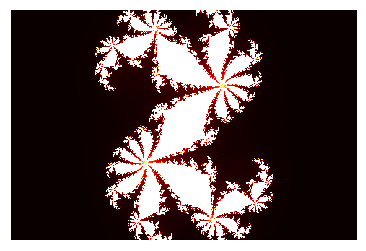

In [41]:
import numpy as np
#from scipy import misc
import matplotlib.pyplot as plt
 
m = 480
n = 320
 
s = 300  # Scale.
x = np.linspace(-m / s, m / s, num=m).reshape((1, m))
y = np.linspace(-n / s, n / s, num=n).reshape((n, 1))
Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
 
C = np.full((n, m), 0.36 + 0.1j)
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))
for i in range(256):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i
 
#misc.imsave('julia-m.png', np.flipud(1 - M))
#misc.imsave('julia.png', np.flipud(255 - N))
 
# Save with Matplotlib using a colormap.
fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.flipud(N), cmap='hot')
plt.savefig('julia-plt.png')
#plt.close()